In [2]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
2


# Sigma net weight distribution

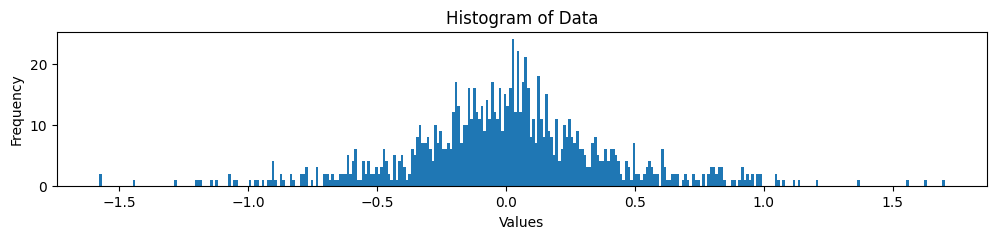

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 2]

log_file = "/external-volume/exp-weight-distribution"
sigma_net_log_file = f"{log_file}/sigma_net"

weight = np.load(f"{sigma_net_log_file}/1.weight.npy")
data = weight.reshape(-1)

min_val = min(data)
max_val = max(data)
step_size = 0.01

# Create histogram
hist, bins = np.histogram(data, bins=np.arange(min_val, max_val + step_size, step_size))

# Plot histogram
plt.bar(bins[:-1], hist, align='center', width=step_size)  # Adjust width as per the step size
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

# Color net weight distribution

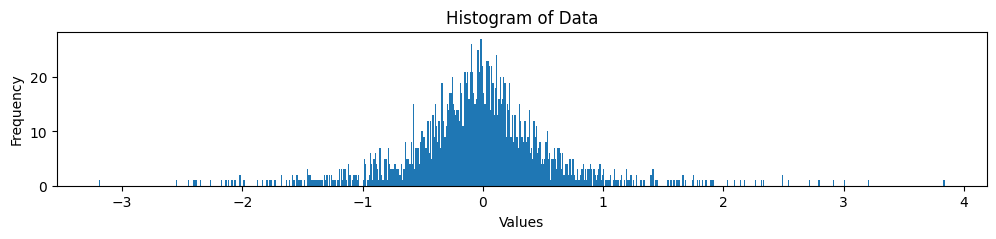

In [35]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 2]

log_file = "/external-volume/exp-weight-distribution"
sigma_net_log_file = f"{log_file}/color_net"

weight = np.load(f"{sigma_net_log_file}/0.weight.npy")
data = weight.reshape(-1)

min_val = min(data)
max_val = max(data)
step_size = 0.01

# Create histogram
hist, bins = np.histogram(data, bins=np.arange(min_val, max_val + step_size, step_size))

# Plot histogram
plt.bar(bins[:-1], hist, align='center', width=step_size)  # Adjust width as per the step size
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

# Embedding vector distribution

(17,)
LEVEL: 0, SUM: 4618, CHECK: 4920


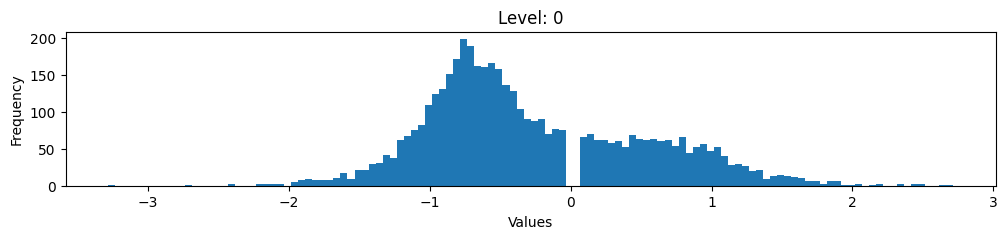

LEVEL: 1, SUM: 11604, CHECK: 15632


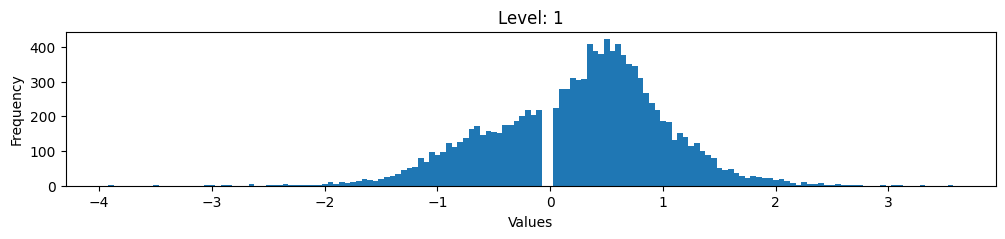

LEVEL: 2, SUM: 30166, CHECK: 42880


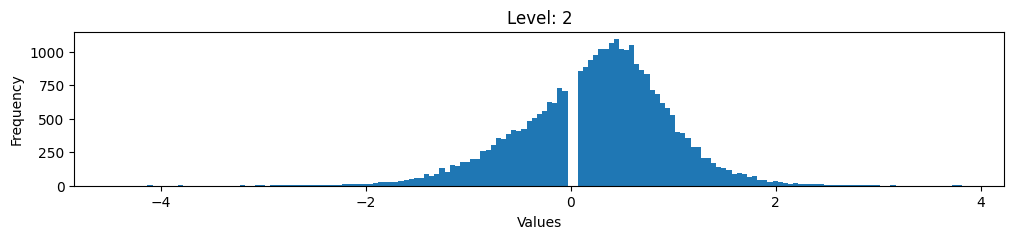

LEVEL: 3, SUM: 91030, CHECK: 125000


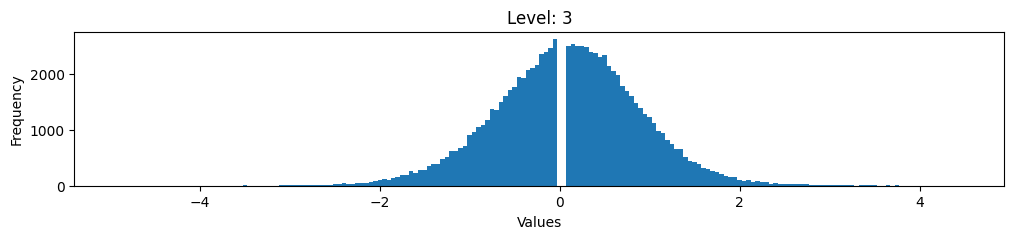

LEVEL: 4, SUM: 267939, CHECK: 373248


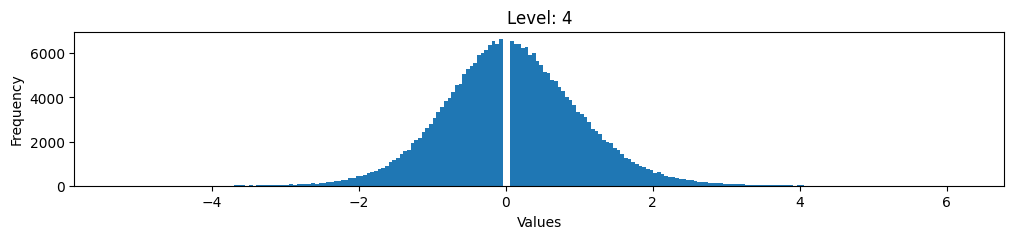

LEVEL: 5, SUM: 274378, CHECK: 524288


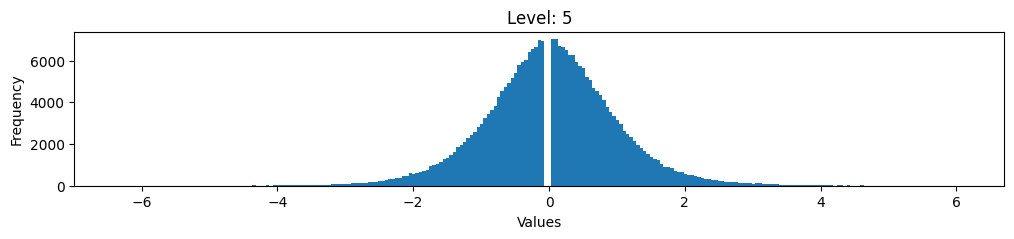

LEVEL: 6, SUM: 346798, CHECK: 524288


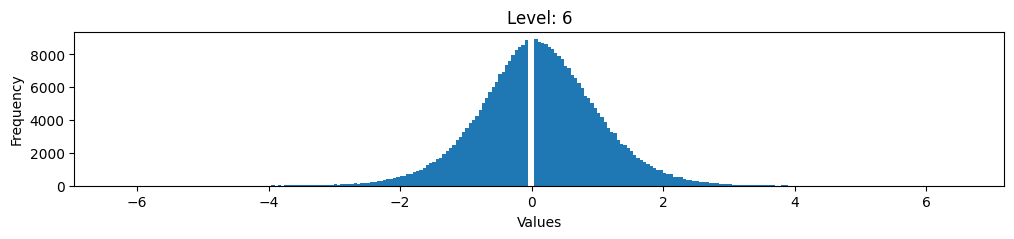

LEVEL: 7, SUM: 375750, CHECK: 524288


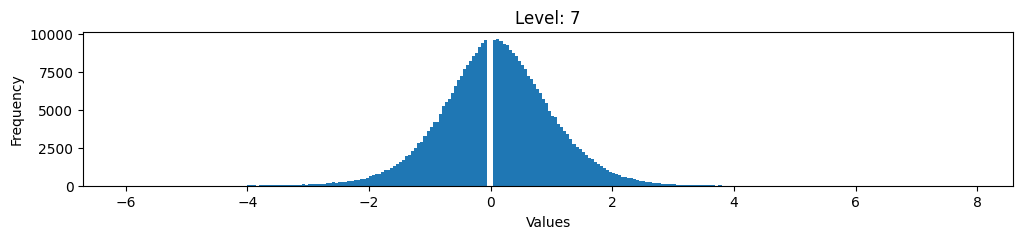

LEVEL: 8, SUM: 482156, CHECK: 524288


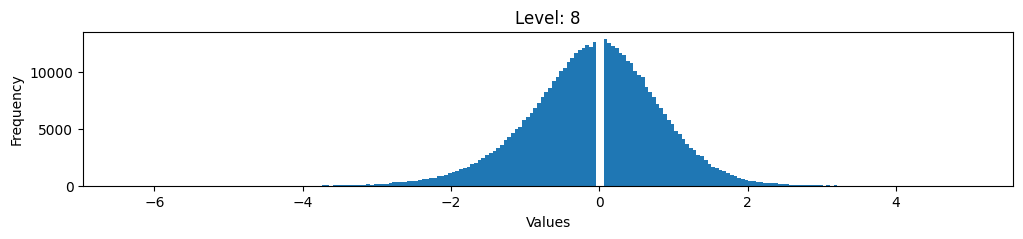

LEVEL: 9, SUM: 492628, CHECK: 524288


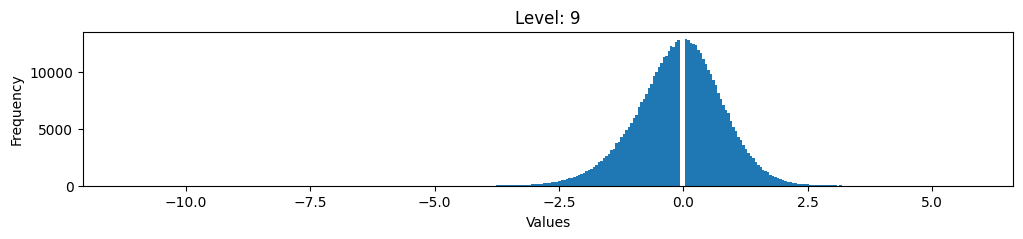

LEVEL: 10, SUM: 497712, CHECK: 524288


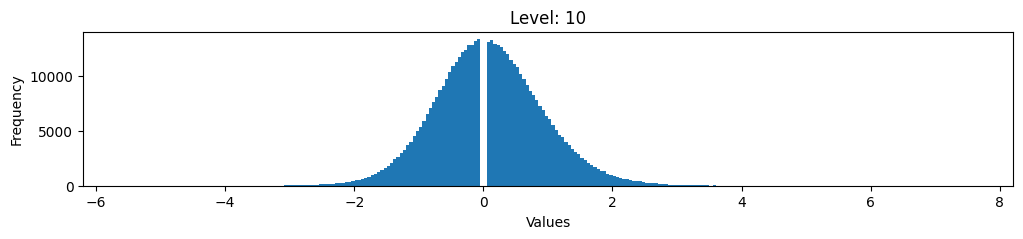

LEVEL: 11, SUM: 497621, CHECK: 524288


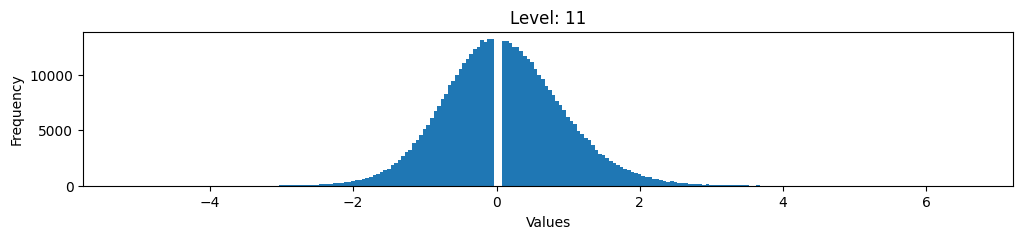

LEVEL: 12, SUM: 497194, CHECK: 524288


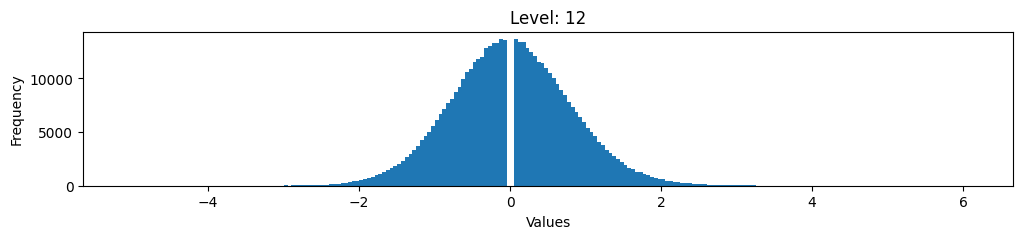

LEVEL: 13, SUM: 496444, CHECK: 524288


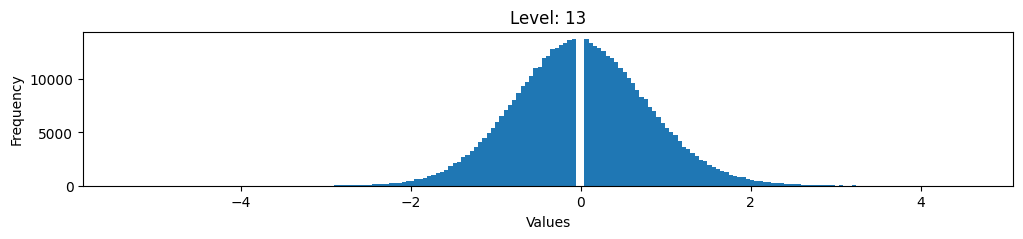

LEVEL: 14, SUM: 496710, CHECK: 524288


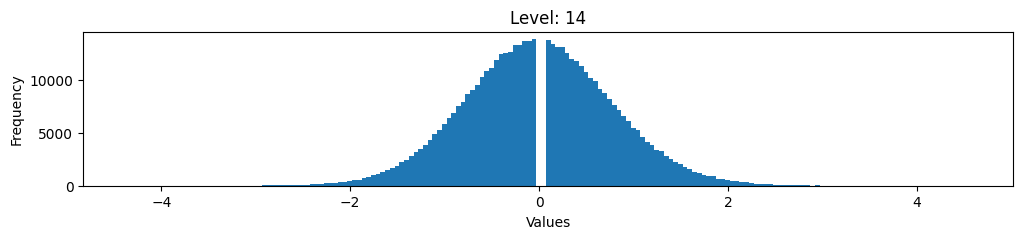

LEVEL: 15, SUM: 496634, CHECK: 524288


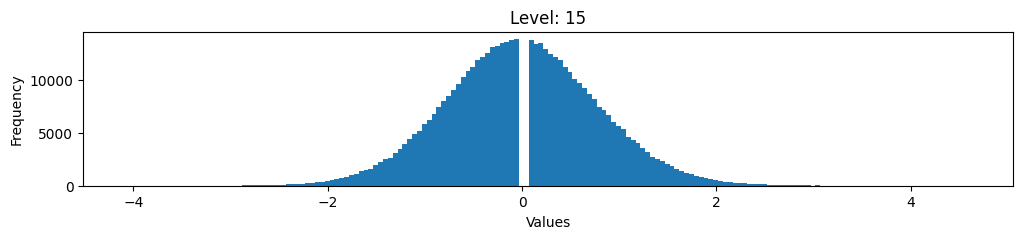

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 2]

log_file = "/external-volume/exp-weight-distribution"
sigma_net_log_file = f"{log_file}/encoder"

offsets = np.load(f"{sigma_net_log_file}/offsets.npy").reshape(-1)
print(offsets.shape)

for level in range(16):
    weight = np.load(f"{sigma_net_log_file}/embeddings.npy")
    data = weight.reshape(-1)[offsets[level]:offsets[level + 1]]

    min_val = min(data)
    max_val = max(data)
    step_size = 0.05

    # Create histogram
    hist, bins = np.histogram(data, bins=np.arange(min_val, max_val + step_size, step_size))
    
    real_hist = []
    real_bins = []
        
    for i in range(len(bins[:-1])):
        if np.abs(bins[i]) < step_size: continue
        # if hist[i] > 30: continue
        real_hist.append(hist[i])
        real_bins.append(bins[i])
    
    
    print(f"LEVEL: {level}, SUM: {np.sum(real_hist)}, CHECK: {np.sum(hist)}")
    
    hist = real_hist
    bins = real_bins
    
    # Plot histogram
    plt.bar(bins, hist, align='center', width=step_size)  # Adjust width as per the step size
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Level: {level}')
    plt.show()

# Embedding vector feature diff distribution

(17,)
Level: 0, SUM: 3425, CHECK: 4920


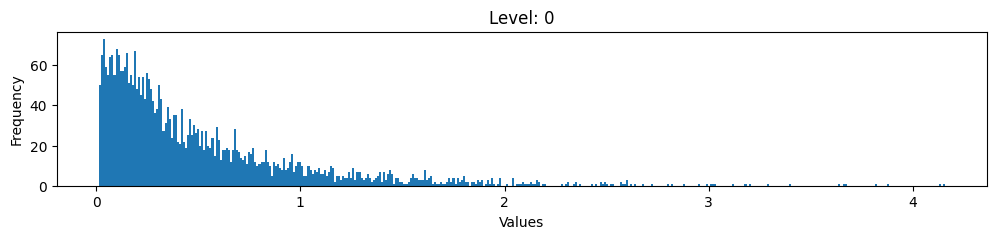

Level: 1, SUM: 9519, CHECK: 15632


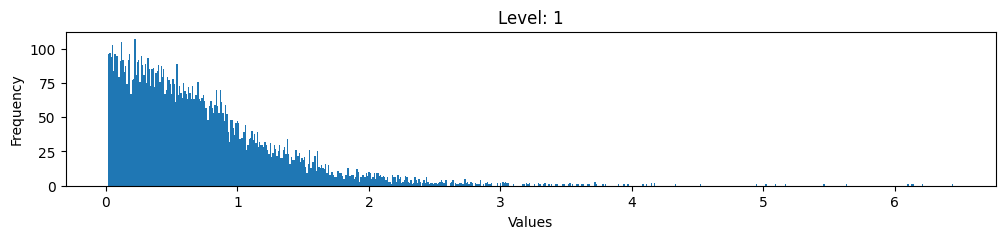

Level: 2, SUM: 28230, CHECK: 42880


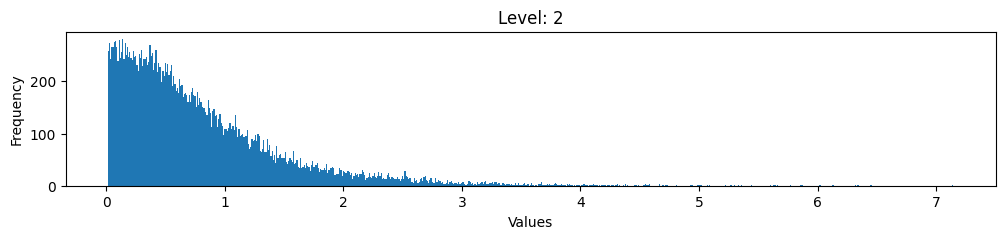

Level: 3, SUM: 81251, CHECK: 125000


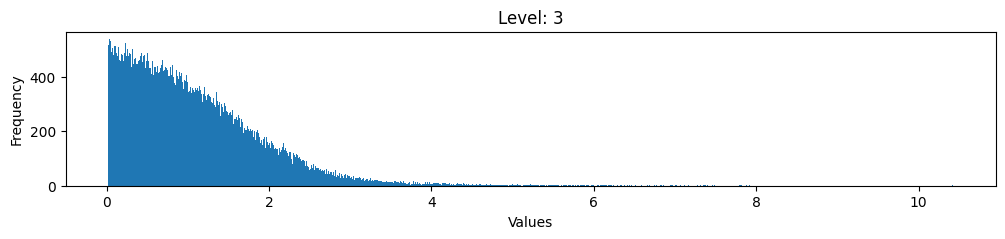

Level: 4, SUM: 232428, CHECK: 373248


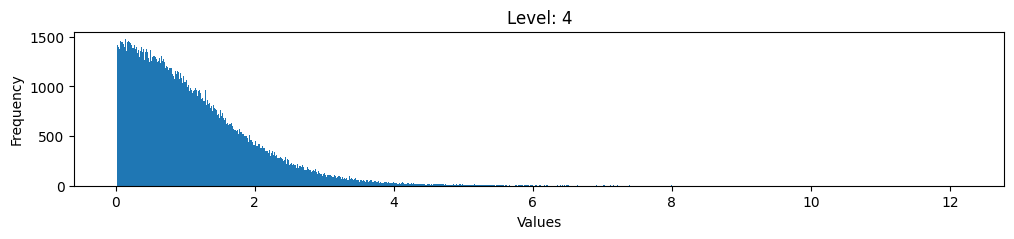

Level: 5, SUM: 391921, CHECK: 524288


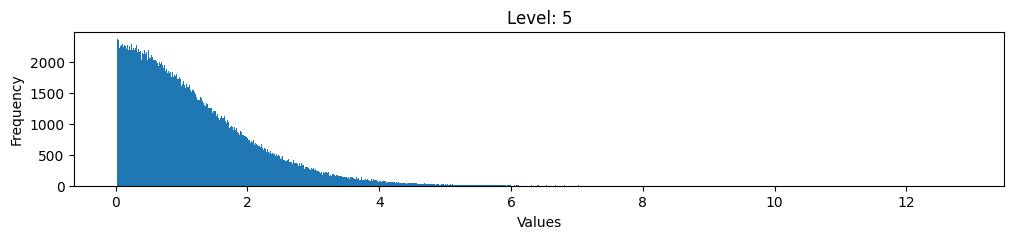

Level: 6, SUM: 510521, CHECK: 524288


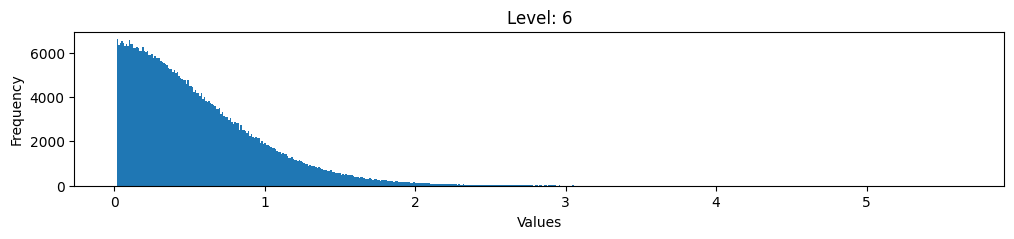

Level: 7, SUM: 520581, CHECK: 524288


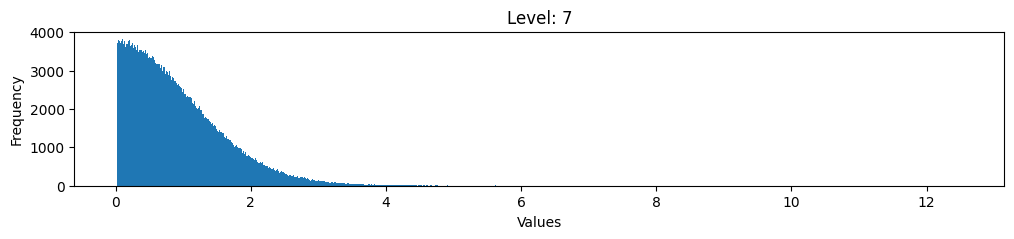

Level: 8, SUM: 520687, CHECK: 524288


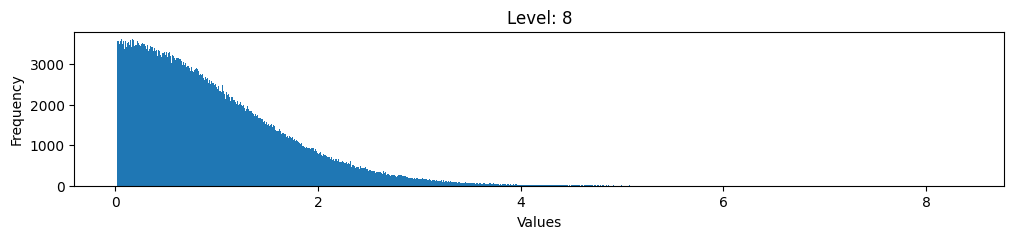

Level: 9, SUM: 520680, CHECK: 524288


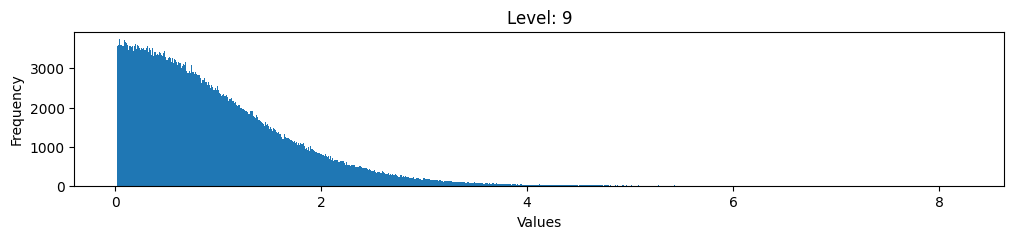

Level: 10, SUM: 520029, CHECK: 524288


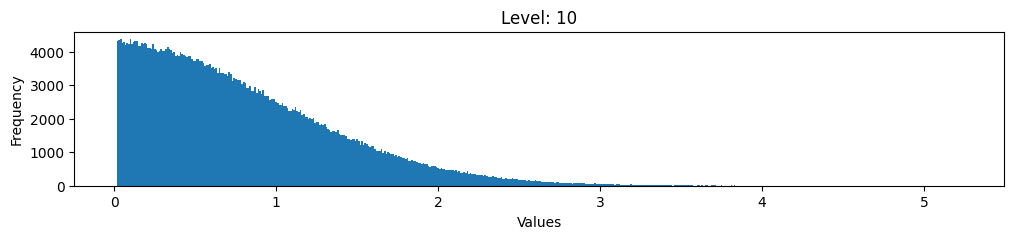

Level: 11, SUM: 519967, CHECK: 524288


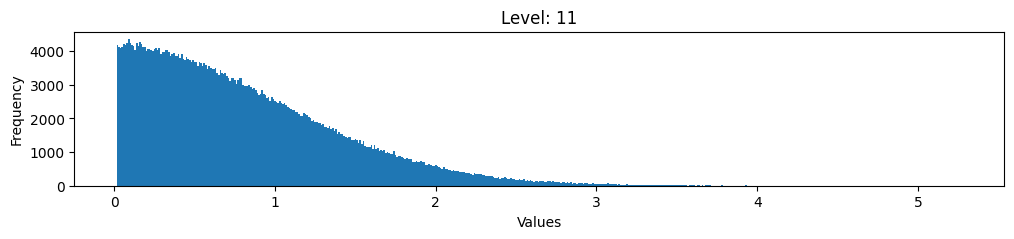

Level: 12, SUM: 520211, CHECK: 524288


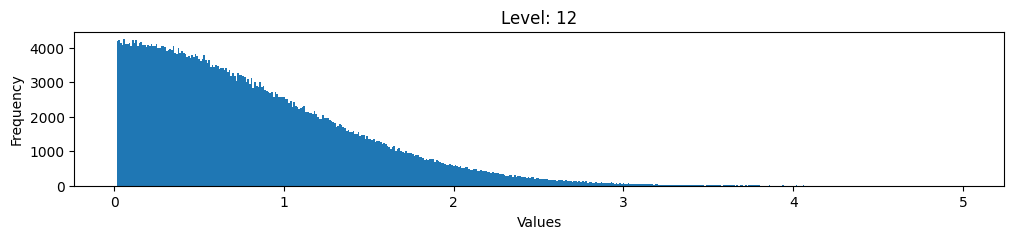

Level: 13, SUM: 519838, CHECK: 524288


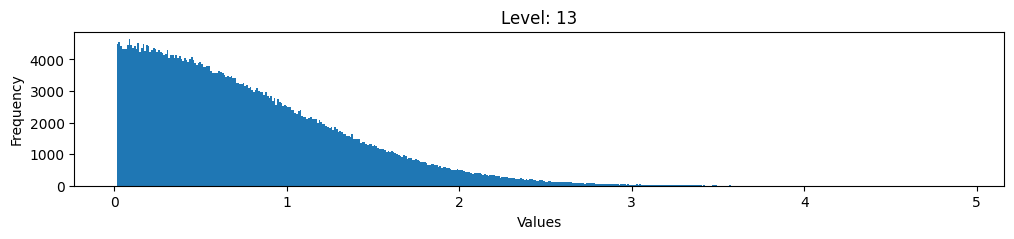

Level: 14, SUM: 520113, CHECK: 524288


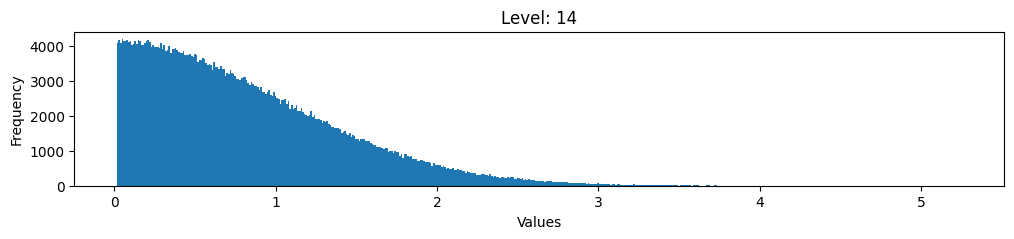

Level: 15, SUM: 519903, CHECK: 524288


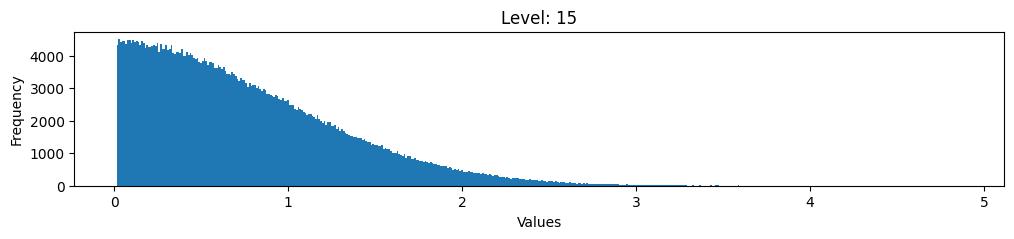

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 2]

log_file = "/external-volume/exp-weight-distribution"
sigma_net_log_file = f"{log_file}/encoder"

offsets = np.load(f"{sigma_net_log_file}/offsets.npy").reshape(-1)
print(offsets.shape)

for level in range(16):
    weight = np.load(f"{sigma_net_log_file}/embeddings.npy")
    data = weight[:,0].reshape(-1)[offsets[level]:offsets[level + 1]]
    data2 = weight[:,1].reshape(-1)[offsets[level]:offsets[level + 1]]
    
    data = np.abs(data - data2)

    min_val = min(data)
    max_val = max(data)
    step_size = 0.01
    
    # Create histogram
    hist, bins = np.histogram(data, bins=np.arange(min_val, max_val + step_size, step_size))

    tmp = 1
    print(f"Level: {level}, SUM: {np.sum(hist[tmp:])}, CHECK: {np.sum(hist)}")
    
    # Plot histogram
    plt.bar(bins[(tmp + 1):], hist[tmp:], align='center', width=step_size)  # Adjust width as per the step size
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Level: {level}')
    plt.show()